In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import os
      


In [2]:
input_size = 3072
D_in = input_size
H = 50
D_out = 10
num_epochs = 10
transformation = transforms.Compose( [transforms.Resize((32,32)), 
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                          std=[0.5, 0.5, 0.5])])
training_set = torchvision.datasets.ImageFolder('/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/TrainSet', 
                                                transform=transformation)
                                                
train_loader = torch.utils.data.DataLoader(training_set, batch_size=100, shuffle=True, num_workers=2)
testing_set = torchvision.datasets.ImageFolder('/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/TestSet', transform=transformation)
test_loader = torch.utils.data.DataLoader(training_set, batch_size=100, shuffle=True, num_workers=2)

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td

class MultiLayerFCNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(MultiLayerFCNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, H)
        self.linear4 = torch.nn.Linear(H, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return F.log_softmax(x,dim=1)


In [4]:
model = MultiLayerFCNet(D_in, H, D_out)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [5]:
for epoch in range(num_epochs):
    avg_loss_epoch = 0
    batch_loss = 0
    total_batches = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 32 * 32 * 3)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_batches += 1
        batch_loss += loss.item()
        avg_loss_epoch = batch_loss / total_batches
        print('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]'
        .format(epoch + 1, num_epochs, epoch + 1, avg_loss_epoch))

Epoch [1/10], Averge Loss:for epoch[1, 2.2698]
Epoch [1/10], Averge Loss:for epoch[1, 2.2680]
Epoch [1/10], Averge Loss:for epoch[1, 2.2694]
Epoch [1/10], Averge Loss:for epoch[1, 2.2620]
Epoch [1/10], Averge Loss:for epoch[1, 2.2540]
Epoch [1/10], Averge Loss:for epoch[1, 2.2485]
Epoch [1/10], Averge Loss:for epoch[1, 2.2470]
Epoch [1/10], Averge Loss:for epoch[1, 2.2403]
Epoch [1/10], Averge Loss:for epoch[1, 2.2358]
Epoch [1/10], Averge Loss:for epoch[1, 2.2286]
Epoch [1/10], Averge Loss:for epoch[1, 2.2196]
Epoch [1/10], Averge Loss:for epoch[1, 2.2104]
Epoch [1/10], Averge Loss:for epoch[1, 2.1993]
Epoch [1/10], Averge Loss:for epoch[1, 2.1889]
Epoch [1/10], Averge Loss:for epoch[1, 2.1770]
Epoch [1/10], Averge Loss:for epoch[1, 2.1650]
Epoch [1/10], Averge Loss:for epoch[1, 2.1540]
Epoch [1/10], Averge Loss:for epoch[1, 2.1408]
Epoch [1/10], Averge Loss:for epoch[1, 2.1238]
Epoch [1/10], Averge Loss:for epoch[1, 2.1078]
Epoch [1/10], Averge Loss:for epoch[1, 2.0943]
Epoch [1/10],

In [6]:
correct = 0
total = 0
for images, labels in test_loader:
    images = images.reshape(-1, 3 * 32 * 32)
    outputs_test = model(images)
    _, predicted = torch.max(outputs_test.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 1900 test images: %d %%'
    % (100 * correct / total))


Accuracy of the network on the 1900 test images: 74 %
Accuracy of the network on the 1900 test images: 71 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 73 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 71 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on the 1900 test images: 72 %
Accuracy of the network on t

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
        self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(8 * 8 * 64, 1000),
        nn.ReLU(inplace=True),
        nn.Linear(1000, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(512, 10)
    )
    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)
        return x


In [8]:
num_epochs = 10
num_classes = 4
learning_rate = 0.001


In [9]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
             .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
             (correct / total) * 100))

Epoch [1/4], Step [1/25], Loss: 0.0317, Accuracy: 99.00%
Epoch [1/4], Step [2/25], Loss: 0.0361, Accuracy: 99.00%
Epoch [1/4], Step [3/25], Loss: 0.0410, Accuracy: 99.00%
Epoch [1/4], Step [4/25], Loss: 0.0158, Accuracy: 100.00%
Epoch [1/4], Step [5/25], Loss: 0.0151, Accuracy: 100.00%
Epoch [1/4], Step [6/25], Loss: 0.0230, Accuracy: 99.00%
Epoch [1/4], Step [7/25], Loss: 0.0059, Accuracy: 100.00%
Epoch [1/4], Step [8/25], Loss: 0.0061, Accuracy: 100.00%
Epoch [1/4], Step [9/25], Loss: 0.0150, Accuracy: 100.00%
Epoch [1/4], Step [10/25], Loss: 0.0059, Accuracy: 100.00%
Epoch [1/4], Step [11/25], Loss: 0.0119, Accuracy: 100.00%
Epoch [1/4], Step [12/25], Loss: 0.0082, Accuracy: 100.00%
Epoch [1/4], Step [13/25], Loss: 0.0363, Accuracy: 99.00%
Epoch [1/4], Step [14/25], Loss: 0.0103, Accuracy: 100.00%
Epoch [1/4], Step [15/25], Loss: 0.0058, Accuracy: 100.00%
Epoch [1/4], Step [16/25], Loss: 0.0076, Accuracy: 100.00%
Epoch [1/4], Step [17/25], Loss: 0.0108, Accuracy: 100.00%
Epoch [1/4]

In [40]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 1900 test images: {} %'
          .format((correct / total) * 100))

Test Accuracy of the model on the 1900 test images: 69.0 %
Test Accuracy of the model on the 1900 test images: 72.5 %
Test Accuracy of the model on the 1900 test images: 70.0 %
Test Accuracy of the model on the 1900 test images: 72.5 %
Test Accuracy of the model on the 1900 test images: 72.8 %
Test Accuracy of the model on the 1900 test images: 73.33333333333333 %
Test Accuracy of the model on the 1900 test images: 74.85714285714286 %
Test Accuracy of the model on the 1900 test images: 74.75 %
Test Accuracy of the model on the 1900 test images: 74.44444444444444 %
Test Accuracy of the model on the 1900 test images: 73.8 %
Test Accuracy of the model on the 1900 test images: 74.0 %
Test Accuracy of the model on the 1900 test images: 74.0 %
Test Accuracy of the model on the 1900 test images: 74.0 %
Test Accuracy of the model on the 1900 test images: 73.64285714285714 %
Test Accuracy of the model on the 1900 test images: 73.93333333333332 %
Test Accuracy of the model on the 1900 test image

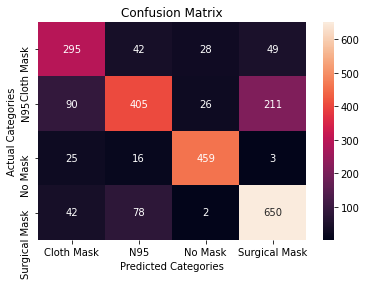

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       452
           1       0.55      0.75      0.64       541
           2       0.91      0.89      0.90       515
           3       0.84      0.71      0.77       913

    accuracy                           0.75      2421
   macro avg       0.76      0.75      0.75      2421
weighted avg       0.77      0.75      0.75      2421



In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())
  
  
confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Cloth Mask','N95','No Mask','Surgical Mask'])
confusionMatrix.yaxis.set_ticklabels(['Cloth Mask','N95','No Mask','Surgical Mask'])

  
plt.show()

print(classification_report(prediction_list, accurate_list))